<a href="https://colab.research.google.com/github/OFKadi/Bitirme_Projesi/blob/main/HW1_ofk_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip uninstall scikit-learn -y

!pip install -U scikit-learn

Found existing installation: scikit-learn 0.22.2.post1
Uninstalling scikit-learn-0.22.2.post1:
  Successfully uninstalled scikit-learn-0.22.2.post1
     |████████████████████████████████| 23.1 MB 5.5 kB/s 


In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, SplineTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from numpy import pi

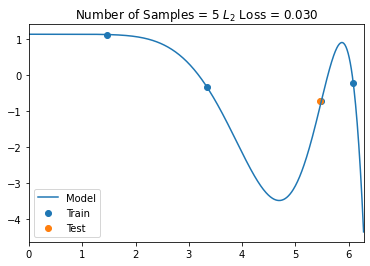

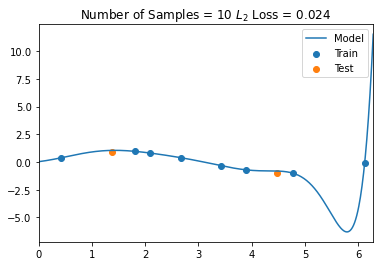

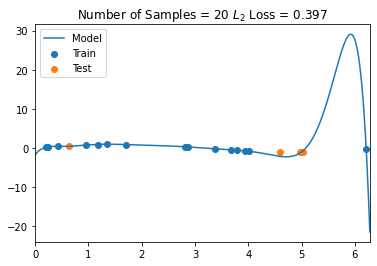

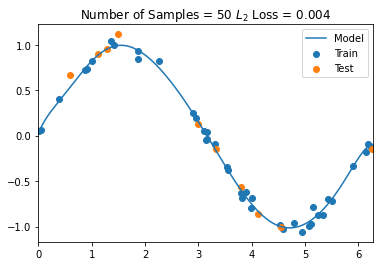

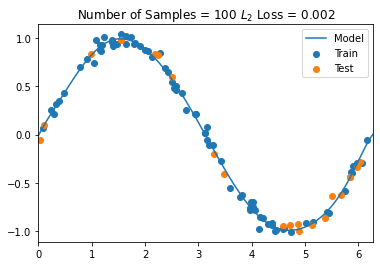

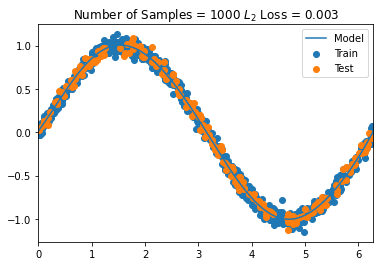

In [90]:
mean, std, test_size = 0, 0.05, 0.2
n = [5, 10, 20, 50, 100, 1000]
degree = 10

np.random.seed(8)

for i in n:
  x = 2*pi*np.random.rand(i, 1) 
  y = np.sin(x) + np.random.normal(mean, std, size=(i, 1))
  X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=test_size, random_state=0)

  model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
  model.fit(X_train, Y_train)

  X_grid = np.arange(0, 2*pi, 0.01).reshape(-1, 1)
  y_pre = model.predict(X_grid)

  loss = mean_squared_error(Y_test, model.predict(X_test))

  fig, ax = plt.subplots()
  plt.title("Number of Samples = %.d $ L_2 $ Loss = %.3f" %(i, loss))
  ax.scatter(X_train,Y_train, label="Train")
  ax.scatter(X_test, Y_test, label="Test")
  ax.plot(X_grid,y_pre, label="Model")
  ax.legend(loc='best')
  ax.set_xlim(0, 2*pi)
  plt.show()

